# Hồi quy logistic (Logistic regression):
***

1. Giới thiệu:

Hai mô hình tuyến tính (linear models) Linear Regression và Perceptron Learning Algorithm (PLA) chúng ta đã biết đều có chung một dạng: $$y=f(w^{T}x)$$
Trong đó $f()$ được gọi là activation function, và $x$ được hiểu là dữ liệu mở rộng với $x_{0}=1$ được thêm vào để thuận tiện cho việc tính toán. Với linear regression thì $f(s)=s$, với PLA thì $f(s)=sgn(s)$. Trong linear regression, tích vô hướng $w^{T}x$ được trực tiếp sử dụng để dự đoán output $y$, loại này phù hợp nếu chúng ta cần dự đoán một giá trị thực của đầu ra không bị chặn trên và dưới.

Trong bài tập, chúng em sẽ giới thiệu loại hồi quy mới được sử dụng cho các bài toán có đầu ra được thể hiện ở dạng xác suất (probality)

    1.1. Mô hình Logistic Regression:

Đầu ra dự đoán của logistic regression thường được viết chung dưới dạng: $$f(x)=\theta(w^{T}x)$$
Trong đó $\theta$ được gọi là logistic function. Một số activation cho mô hình tuyến tính được cho trong hình dưới đây:
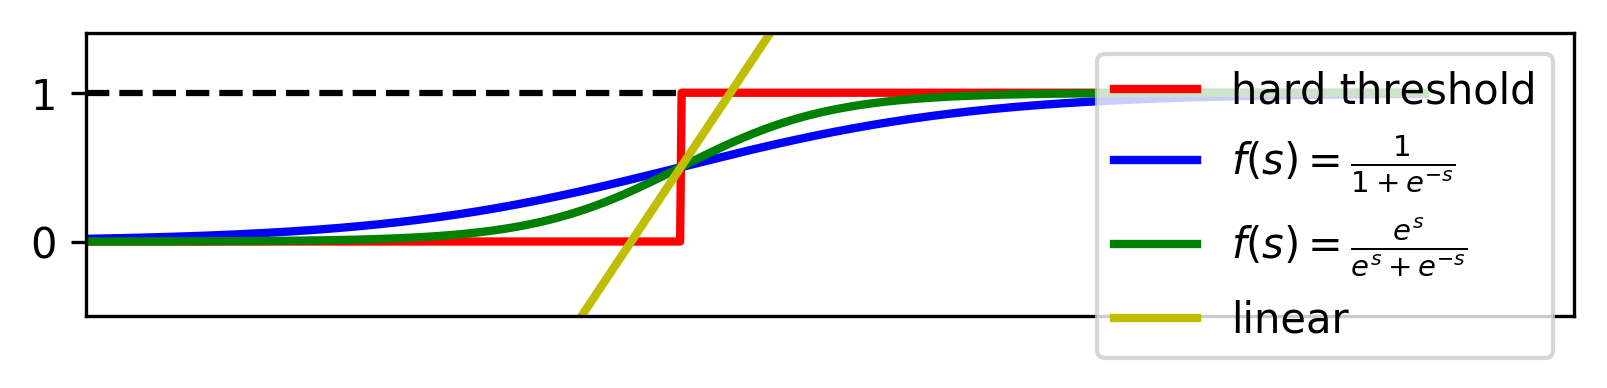

        - Đường màu vàng biểu diễn linear regression. Đường này không bị chặn nên không phù hợp cho bài toán này. Có một trick nhỏ để đưa nó về dạng bị chặn: cắt phần nhỏ hơn 0 bằng cách cho chúng bằng 0, cắt các phần lớn hơn 1 bằng cách cho chúng bằng 1. Sau đó lấy điểm trên đường thẳng này có tung độ bằng 0.5 làm điểm phân chia hai class, đây cũng không phải là một lựa chọn tốt. Giả sử có thêm vài bạn sinh viên tiêu biểu ôn tập đến 20 giờ và, tất nhiên, thi đỗ. Khi áp dụng mô hình linear regression như hình dưới đây và lấy mốc 0.5 để phân lớp, toàn bộ sinh viên thi trượt vẫn được dự đoán là trượt, nhưng rất nhiều sinh viên thi đỗ cũng được dự đoán là trượt (nếu ta coi điểm x màu xanh lục là ngưỡng cứng để đưa ra kết luận). Rõ ràng đây là một mô hình không tốt. Anh chàng sinh viên tiêu biểu này đã kéo theo rất nhiều bạn khác bị trượt.
        - Đường màu đỏ (chỉ khác với activation function của PLA ở chỗ hai class là 0 và 1 thay vì -1 và 1) cũng thuộc dạng ngưỡng cứng (hard threshold). PLA không hoạt động trong bài toán này vì dữ liệu đã cho không linearly separable.
        - Các đường màu xanh lam và xanh lục phù hợp với bài toán của chúng ta hơn. Chúng có một vài tính chất quan trọng sau:
            * Là hàm số liên tục nhận giá trị thực, bị chặn trong khoảng (0,1)
            * Nếu coi điểm có tung độ là 1/2 làm điểm phân chia thì các điểm càng xa điểm này về phía bên trái có giá trị càng gần 0. Ngược lại, các điểm càng xa điểm này về phía phải có giá trị càng gần 1.
            * Mượt (smooth) nên có đạo hàm mọi nơi, có thể được lợi trong việc tối ưu.

    1.2. Sigmoid function:

Trong số các hàm số có 3 tính chất nói trên thì hàm $sigmoid$: $$f(s)=\dfrac{1}{1+e^{-s}}=\sigma(s)$$
được sử dụng nhiều nhất, vì nó bị chặn trong khoảng (0,1): $$\lim_{s \to -\infty} \sigma(s)=0; \lim_{s \to +\infty} \sigma(s)=1$$
Đặc biệt hơn nữa:
\begin{align}
\sigma'(s)&=\dfrac{e^{-s}}{(1+e^{-s})^2}\\
&=\dfrac{1}{1+e^{-s}} \cdot \dfrac{e^{-s}}{1+e^{-s}}\\
&=\sigma(s)(1-\sigma(s))
\end{align}
Công thức đạo hàm đơn giản thế này giúp hàm số này được sử dụng rộng rãi. Ở phần sau, tôi sẽ lý giải việc người ta đã tìm ra hàm số đặc biệt này như thế nào.

Ngoài ra, hàm $\tanh$ cũng hay được sử dụng: $$tanh(s)=\dfrac{e^{s}-e^{-s}}{e^{s}+e^{-s}}$$


2. Hàm mất mát và phương pháp tối ưu:

Ta có thể giả sử rằng xác suất để một điểm dữ liệu x rơi vào class 1 là $f(w^{T}x)$ và rơi vào class 0 là $1−f(w^{T}x)$. Với mô hình được giả sử như vậy, với các điểm dữ liệu training (đã biết đầu ra y), ta có thể viết như sau:
\begin{align}
P(y_{i}=1|x_{i};w)&=f(w^{T}x_{i})\\
P(y_{i}=0|x_{i};w)&=1-f(w^{T}x_{i})
\end{align}
Trong đó, $P(y_{i}=1|x_{i};w)$ được hiểu là xác suất xảy ra sự kiện đầu ra $y_{i}=1$ khi biết tham số mô hình $w$ và dữ liệu đầu vào $x_{i}$. Mục đích của chúng ta là tìm các hệ số w sao cho $f(w^{T}x_{i})$ càng gần với 1 càng tốt với các điểm dữ liệu thuộc class 1 và càng gần với 0 càng tốt với những điểm thuộc class 0.

Ký hiệu $z=f(w^{T}x_{i})$ và viết gộp lại 2 biểu thức bên dưới ta có: $$P(y_{i}|x_{i};w)={z_{i}}^{y_{i}}{(1-z_{i})}^{1-y_{i}}$$

Ta có: $$P(y|x;w)=\displaystyle\prod_{i=1}^{N} P(y_{i}|x_{i};w)$$
Công thức cập nhật cho logistic sigmoid regression: $$w=w+\eta(y_{i}z_{i})x_{i}$$

# Các thư viện chính được sử dụng trong bài tập này gồm có:

1. `NumPy` (thư viện nền tảng chuyên xử lý toán học)
2. `Pandas` (Thư viện tương tác dữ liệu sử dụng numpy làm nền tảng tính toán đại số)
3. `Seaborn` (Thư viện tực quan hoá dữ liệu sử dụng thư viện đồ hoạ matplotlib làm nền tảng)
4. `Matplotlib` (Thư viện đồ hoạ được sử dụng để vẽ đồ thị và lưu hình ảnh)
5. `Sklearn` (Thư viện machine learning mã nguồn mở của python):
    * `Model` được sử dụng ở đây là `train_test_split` (Tách dữ liệu biến độc lập và biến phụ thuộc thành hai phần: phần dữ liệu để `huấn luyện` và phần dữ liệu để `kiểm tra` (test)
    * `linear_model` được sử dụng là `hồi quy Logistic`
    * `Tiền xử lý` là hiệu chuẩn độ chênh lệch giá trị của các biến để `tăng độ chính xác` cho mô hình `hồi quy Logistic`
    * `Đơn vị đo` để kiểm tra `mức độ chính xác` của mô hình

In [1]:
import numpy as np
import pandas as pd
import seaborn as sb
sb.set(style="white")
sb.set(style="whitegrid", color_codes=True)
import matplotlib.pyplot as plt
plt.rc("font",size=14)
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score

# Nạp dữ liệu từ file 'Xahoi.csv' vào DataFrame

In [2]:
raw_data = pd.read_csv('Xahoi.csv')
raw_data

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


# Kiểm tra thông tin dữ liệu

Như trong bài tập này, dữ liệu được nạp vào có 5 thuộc tính: User ID, Gender, Age, EstimatedSalary (Lương ước tính), Purchased và 400 bản ghi có kiểu là int64 (trừ `Gender` có kiểu là object).

In [3]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


# Tiến hành lọc dữ liệu có giá trị null (nếu có)

* Tính số lượng thuộc tính bị null
* Lọc bỏ bản ghi có thuộc tính bị null

In [4]:
raw_data.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [5]:
raw_data.dropna(inplace=True)

# Biến đổi trường `Gender` thành biến nhị phân (Chỉ có giá trị 0 hoặc 1)

In [6]:
raw_data['Gender']=pd.get_dummies(raw_data['Gender'])

In [7]:
raw_data

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,0,19,19000,0
1,15810944,0,35,20000,0
2,15668575,1,26,43000,0
3,15603246,1,27,57000,0
4,15804002,0,19,76000,0
...,...,...,...,...,...
395,15691863,1,46,41000,1
396,15706071,0,51,23000,1
397,15654296,1,50,20000,1
398,15755018,0,36,33000,0


# Lọc và kiểm tra đối tượng theo độ tuổi

In [8]:
raw_data['Age'].unique()

array([19, 35, 26, 27, 32, 25, 20, 18, 29, 47, 45, 46, 48, 49, 31, 21, 28,
       33, 30, 23, 24, 22, 59, 34, 39, 38, 37, 42, 40, 36, 41, 58, 55, 52,
       60, 56, 53, 50, 51, 57, 44, 43, 54], dtype=int64)

In [9]:
raw_data['Age'].value_counts()

35    32
37    20
41    16
42    16
26    16
39    15
40    15
47    14
48    14
38    13
27    13
28    12
46    12
36    12
31    11
30    11
29    10
49    10
32     9
33     9
24     9
20     7
19     7
60     7
59     7
45     7
25     6
34     6
58     6
52     6
23     6
57     5
22     5
18     5
53     5
21     4
50     4
54     4
55     3
43     3
56     3
51     3
44     2
Name: Age, dtype: int64

# Trực quan số người theo độ tuổi bằng `Matplotlib`

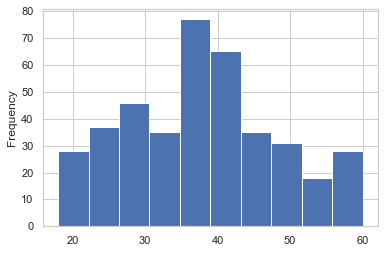

In [10]:
raw_data['Age'].plot.hist()

# Trực quan hoá dữ liệu của các biến được tính toán bằng `Seaborn`

In [11]:
#sb.pairplot(raw_data)

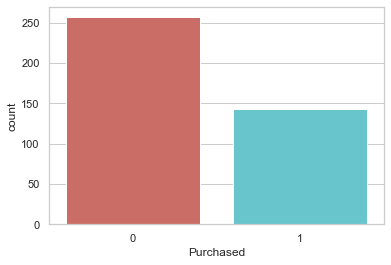

<Figure size 432x288 with 0 Axes>

In [12]:
sb.countplot(x='Purchased',data=raw_data,palette='hls')
plt.show()
plt.savefig('count_plot_purchased')

# Số người trả thuế xếp theo giới tính

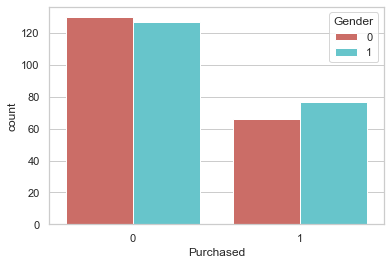

<Figure size 432x288 with 0 Axes>

In [13]:
sb.countplot(x='Purchased',hue="Gender",data=raw_data,palette='hls')
plt.show()
plt.savefig('count_plot_purchased_Gender')

# Số người trả thuế xếp theo độ tuổi

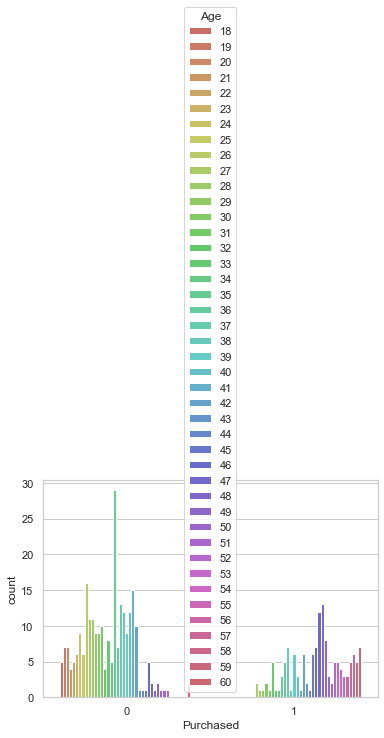

<Figure size 432x288 with 0 Axes>

In [14]:
sb.countplot(x='Purchased',hue="Age",data=raw_data,palette='hls')
plt.show()
plt.savefig('count_plot_purchased_age')

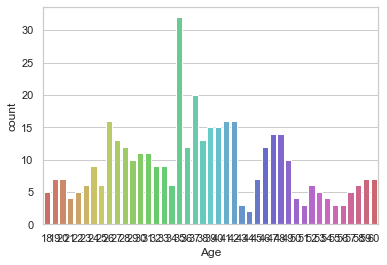

<Figure size 432x288 with 0 Axes>

In [15]:
sb.countplot(x='Age',data=raw_data,palette='hls')
plt.show()
plt.savefig('count_plot_age_purchased')

In [16]:
# sb.regplot(x=raw_data['Age'],y=raw_data['EstimatedSalary'],data=raw_data)

# Nhóm dữ liệu theo trường "Age"

In [17]:
raw_data.groupby('Age').mean()

,User ID,Gender,EstimatedSalary,Purchased
Age,,,,
18,1.567696e+07,0.600000,66400.000000,0.000000
19,1.571065e+07,0.285714,46000.000000,0.000000
20,1.569884e+07,0.571429,61714.285714,0.000000
21,1.565027e+07,0.500000,61000.000000,0.000000
22,1.568825e+07,0.600000,48800.000000,0.000000
23,1.564283e+07,0.666667,51166.666667,0.000000
24,1.569152e+07,0.444444,49111.111111,0.000000
25,1.568253e+07,0.000000,65166.666667,0.000000
26,1.571145e+07,0.562500,53500.000000,0.000000


# Nhóm dữ liệu theo trường "Purchased"

In [18]:
raw_data.groupby('Purchased').mean()

,User ID,Gender,Age,EstimatedSalary
Purchased,,,,
0,1.569116e+07,0.494163,32.793774,60544.747082
1,1.569222e+07,0.538462,46.391608,86272.727273


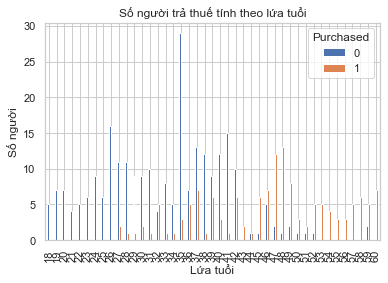

In [19]:
%matplotlib inline
pd.crosstab(raw_data.Age,raw_data.Purchased).plot(kind='bar')
plt.title('Số người trả thuế tính theo lứa tuổi')
plt.xlabel('Lứa tuổi')
plt.ylabel('Số người')
plt.savefig('purchased_age')

In [20]:
raw_data.columns.values.tolist()

['User ID', 'Gender', 'Age', 'EstimatedSalary', 'Purchased']

In [21]:
pd.get_dummies(raw_data)

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,0,19,19000,0
1,15810944,0,35,20000,0
2,15668575,1,26,43000,0
3,15603246,1,27,57000,0
4,15804002,0,19,76000,0
...,...,...,...,...,...
395,15691863,1,46,41000,1
396,15706071,0,51,23000,1
397,15654296,1,50,20000,1
398,15755018,0,36,33000,0


In [22]:
#X = raw_data.drop('Purchased',axis=1)
X = raw_data.loc[:,['Age','EstimatedSalary']]

In [23]:
y = raw_data['Purchased']

In [24]:
import statsmodels.api as sm
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.686532
         Iterations 3
                        Results: Logit
Model:              Logit            Pseudo R-squared: -0.053  
Dependent Variable: Purchased        AIC:              553.2253
Date:               2020-07-03 21:37 BIC:              561.2082
No. Observations:   400              Log-Likelihood:   -274.61 
Df Model:           1                LL-Null:          -260.79 
Df Residuals:       398              LLR p-value:      1.0000  
Converged:          1.0000           Scale:            1.0000  
No. Iterations:     3.0000                                     
---------------------------------------------------------------
                  Coef.  Std.Err.    z    P>|z|   [0.025 0.975]
---------------------------------------------------------------
Age              -0.0054   0.0055 -0.9815 0.3263 -0.0162 0.0054
EstimatedSalary  -0.0000   0.0000 -0.1002 0.9202 -0.0000 0.0000



Như báo cáo kết quả thống kê cho thấy, hệ số hồi quy lần lượt là -0.0054 và -0.0000, xác suất cho trường hợp ra giá trị 0 (xác suất đo lường bằng chứng chống lại giả thuyết null) của hai thuộc tính lần lượt là 0.3263, 0.9202.

# Nhập module `SMOTE` (Synthetic Minority Oversampling Technique) để tổng hợp và phân tích dữ liệu quá khổ

`SMOTE` hoạt động bằng cách lấy `các mẫu gần không gian tính năng` (feature space), `vẽ 1 đường thẳng` giữa các mẫu trong không gian tính năng và vẽ 1 điểm mới `dọc theo đường đó`.
>     … SMOTE first selects a minority class instance a at random and finds its k nearest minority class neighbors. The synthetic instance is then created by choosing one of the k nearest neighbors b at random and connecting a and b to form a line segment in the feature space. The synthetic instances are generated as a convex combination of the two chosen instances a and b.
— Page 47, Imbalanced Learning: Foundations, Algorithms, and Applications, 2013.



In [25]:
from imblearn.over_sampling import SMOTE
os = SMOTE(random_state=0)
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.24,random_state=0) # Phân tách dữ liệu cho huấn luyện và kiểm tra
columns = X_train.columns # Tách cột từ dữ liệu huấn luyện
os_data_X,os_data_y=os.fit_sample(X_train, y_train) # Áp dụng mô hình phân tích dữ liệu quá khổ
os_data_X = pd.DataFrame(data=os_data_X,columns=columns) # Chuyển thành DataFrame
os_data_y= pd.DataFrame(data=os_data_y,columns=['Purchased']) # Chuyển thành DataFrame

In [26]:
os_data_X

,Age,EstimatedSalary
0,23,63000
1,48,33000
2,48,90000
3,42,104000
4,44,39000
...,...,...
375,49,88199
376,49,73295
377,52,33000
378,45,118682


In [27]:
os_data_y

,Purchased
0,0
1,1
2,1
3,1
4,0
...,...
375,1
376,1
377,1
378,1


In [28]:
print("Độ dài của dữ liệu quá khổ:",len(os_data_X))
print("Số lượng bản ghi có giá trị 0 trong dữ liệu quá khổ:",len(os_data_y[os_data_y['Purchased']==0]))
print("Số lượng bản ghi có giá trị 1:",len(os_data_y[os_data_y['Purchased']==1]))
print("Tỷ lệ dữ liệu có giá trị 0 trong dữ liệu quá khổ:",len(os_data_y[os_data_y['Purchased']==0])/len(os_data_X))
print("Tỷ lệ dữ liệu có giá trị 1 trong dữ liệu quá khổ:",len(os_data_y[os_data_y['Purchased']==1])/len(os_data_X))

Độ dài của dữ liệu quá khổ: 380
Số lượng bản ghi có giá trị 0 trong dữ liệu quá khổ: 190
Số lượng bản ghi có giá trị 1: 190
Tỷ lệ dữ liệu có giá trị 0 trong dữ liệu quá khổ: 0.5
Tỷ lệ dữ liệu có giá trị 1 trong dữ liệu quá khổ: 0.5


In [29]:
X_test

,Age,EstimatedSalary
132,30,87000
309,38,50000
341,35,75000
196,30,79000
246,35,50000
...,...,...
253,37,146000
56,23,48000
8,25,33000
190,24,84000


In [30]:
X_train

,Age,EstimatedSalary
135,23,63000
390,48,33000
264,48,90000
364,42,104000
250,44,39000
...,...,...
323,48,30000
192,29,43000
117,36,52000
47,27,54000


Do dữ liệu về lương và tuổi có sự chênh lệch về khoảng cách nên chúng ta cần hiệu chuẩn độ sai lệch giữa các dòng. Chúng ta sẽ gọi hàm `StandardScaler` từ module `sklearn.preprocessing`.
Hàm đó sẽ chuẩn hoá bằng cách loại bỏ giá trị trung bình và và tỷ lệ theo phương sai đơn vị.
Điểm chuẩn của một mẫu x được tính như sau: $$z = \frac{x - u}{s}$$
Trong đó, u là giá trị trung bình của mẫu huấn luyện hoặc bằng 0 nếu`with_mean=False`, và s là độ lệch chuẩn của mẫu huấn luyện hoặc bằng 1 nếu `with_std=False`.

Giải thích các tham số `with_mean` và `with_std` trong hàm (giá trị mặc định là `True`):
* with_mean:

    Nếu là `True`, căn giữa dữ liệu trước khi chia lấy tỷ lệ. Điều này sẽ không thể thực hiện khi áp trên ma trận thưa thớt, bởi vì việc định tâm chúng đòi hỏi phải có một ma trận được xây dựng dày đặc mà trong các trường hợp thông thường có thể quá lớn để phù hợp với bộ nhớ.
* with_std:

    Nếu là `True`, chia tỷ lệ dữ liệu thành phương sai đơn vị (hoặc độ lệch chuẩn đơn vị)

In [31]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [32]:
X_train

array([[-1.50005227, -0.19245733],
       [ 0.97452929, -1.06439518],
       [ 0.97452929,  0.59228673],
       [ 0.38062972,  0.99919106],
       [ 0.57859624, -0.89000761],
       [-0.60920291,  1.46422457],
       [-0.01530333, -0.57029707],
       [-0.60920291,  1.9001935 ],
       [ 1.37046234, -1.41317032],
       [ 1.46944561,  0.99919106],
       [ 0.08367993, -0.80281383],
       [-0.01530333, -0.25058652],
       [-0.21326986, -0.57029707],
       [-0.21326986, -0.19245733],
       [-0.31225312, -1.29691194],
       [-0.31225312, -0.57029707],
       [ 0.38062972,  0.09818861],
       [ 0.87554603, -0.59936166],
       [ 2.06334518, -1.18065356],
       [ 1.07351256, -0.13432814],
       [ 0.67757951,  1.78393512],
       [-0.70818617,  0.56322213],
       [ 0.77656277,  0.35976997],
       [ 0.87554603, -0.54123247],
       [-1.20310249, -1.58755789],
       [ 2.16232845,  0.94106187],
       [-0.01530333,  1.23170781],
       [ 0.18266319,  1.08638484],
       [ 0.38062972,

In [33]:
X_test

array([[-0.53215076,  0.51272272],
       [ 0.16886431, -0.61146932],
       [-0.09401634,  0.1481199 ],
       [-0.53215076,  0.26965417],
       [-0.09401634, -0.61146932],
       [-0.79503141, -1.52297638],
       [-0.44452388, -1.67489423],
       [-0.00638946,  2.24458614],
       [-1.58367336, -0.06456508],
       [ 0.95750626, -0.8241543 ],
       [-0.53215076, -0.64185289],
       [-0.70740453, -0.45955148],
       [ 0.08123742, -0.45955148],
       [ 0.25649119,  0.20888704],
       [-1.4084196 ,  0.48233915],
       [-0.35689699,  1.42422979],
       [ 0.08123742,  0.20888704],
       [-1.49604648,  0.45195559],
       [ 1.65852133,  1.81921618],
       [-0.09401634, -1.46220925],
       [-0.09401634, -0.70262003],
       [ 0.95750626,  2.24458614],
       [ 0.43174496, -0.58108575],
       [ 0.95750626,  1.05962696],
       [-1.14553895, -1.27990783],
       [ 1.13276002,  2.15343544],
       [-0.70740453,  0.51272272],
       [-0.61977764,  0.30003774],
       [ 0.08123742,

# Áp dụng mô hình hồi quy Logistic

In [34]:
model = LogisticRegression(random_state=0) # Khởi tạo lớp hồi quy logistic với số trạng thái ngẫu nhiên bằng 0

In [35]:
model.fit(X_train,y_train) # Áp dụng mô hình

LogisticRegression(random_state=0)

In [36]:
y_pred = model.predict(X_test)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0], dtype=int64)

In [37]:
model.score(X_test,y_test) # Kiểm tra độ chính xác trong mô hình

0.8958333333333334

In [38]:
model.predict_proba(X_test) # Xác định xác suất dự đoán so với dữ liệu kiểm tra

array([[0.81471656, 0.18528344],
       [0.77760384, 0.22239616],
       [0.72354378, 0.27645622],
       [0.85208465, 0.14791535],
       [0.85889554, 0.14110446],
       [0.98657825, 0.01342175],
       [0.97650029, 0.02349971],
       [0.17476391, 0.82523609],
       [0.98713101, 0.01286899],
       [0.45634091, 0.54365909],
       [0.94069312, 0.05930688],
       [0.94935372, 0.05064628],
       [0.78035664, 0.21964336],
       [0.53877174, 0.46122826],
       [0.96651766, 0.03348234],
       [0.52460868, 0.47539132],
       [0.62831438, 0.37168562],
       [0.97291297, 0.02708703],
       [0.01004377, 0.98995623],
       [0.9399963 , 0.0600037 ],
       [0.87073031, 0.12926969],
       [0.02698819, 0.97301181],
       [0.66006983, 0.33993017],
       [0.09378284, 0.90621716],
       [0.99156136, 0.00843864],
       [0.02076901, 0.97923099],
       [0.86419129, 0.13580871],
       [0.87012685, 0.12987315],
       [0.73719017, 0.26280983],
       [0.75861875, 0.24138125],
       [0.

In [39]:
acc = accuracy_score(y_test,y_pred)
cfs = confusion_matrix(y_test, y_pred)

In [40]:
acc

0.8958333333333334

In [41]:
cfs

array([[62,  5],
       [ 5, 24]], dtype=int64)

In [42]:
from sklearn.metrics import classification_report

In [43]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.93      0.93        67
           1       0.83      0.83      0.83        29

    accuracy                           0.90        96
   macro avg       0.88      0.88      0.88        96
weighted avg       0.90      0.90      0.90        96



Các thông tin mà báo cáo kết quả được tính như sau:
\begin{align}
Precision&=\dfrac{True Positive}{Actual Results} or \dfrac{True Positive}{True Positive + False Positive}\\
Recall&=\dfrac{True Positive}{Predicted Results} or \dfrac{True Positive}{True Positive + False Negative}\\
Accuracy&=\dfrac{True Positive + True Negative}{Total}\\
F1-score&=2 \cdot \dfrac{Precision \cdot Recall}{Precision + Recall}
\end{align}

Như có thể thấy ở trên độ chính xác đạt được sau khi áp dụng mô hình là khoảng 89,53%. Hàm confusion_matrix cho biết có 62+24=86 trường hợp đúng và 5+5=10 trường hợp sai.

# Trực quan hoá `tỉ lệ đúng sai` bằng `matplotlib`

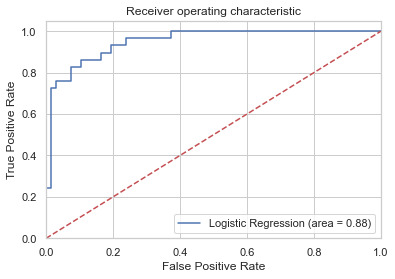

In [44]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, model.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0]) # Thiết lập giới hạn cho giá trị trên trục hoành
plt.ylim([0.0, 1.05]) # Thiết lập giới hạn cho giá trị trên trục tung
plt.xlabel('False Positive Rate') # Tỷ lệ sai
plt.ylabel('True Positive Rate') # Tỷ lệ đúng
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()